In [44]:
import datetime
import yaml
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from metrics import metrics
%matplotlib inline 

In [36]:
filename = 'test_CNN_dis_LSTM_gen20_34.npy'
filename_true = './data/Norm1.csv'
window = 400

In [32]:
Y = pd.read_csv(filename_true)
y = np.array(Y['DE'])
data_true = np.zeros((608, 400))
for i in range(608):
    data_true[i] = y[i*400:(i+1)*400]

In [33]:
data_true

array([[ 0.05319692,  0.08866154,  0.09971815, ...,  0.00521538,
        -0.04380923, -0.06133292],
       [-0.03692492,  0.00458954,  0.01460308, ..., -0.05611754,
        -0.05903815, -0.04255754],
       [-0.00375508,  0.02044431,  0.03316985, ...,  0.06905169,
         0.04380923,  0.06028985],
       ...,
       [-0.024408  , -0.00146031,  0.00458954, ...,  0.07739631,
         0.12454338,  0.15959077],
       [ 0.16856123,  0.14352738,  0.07301538, ..., -0.12725538,
        -0.13768615, -0.105768  ],
       [-0.04756431, -0.00876185,  0.02920615, ...,  0.04088862,
         0.08970462,  0.10222154]])

In [37]:
X = np.load(filename, mmap_mode='r')

In [38]:
X.shape

(608, 400, 1)

In [43]:
data = X.reshape((608,400))

In [40]:
data

,0,1,2,3,4,5,6,7,8,9,...,598,599,600,601,602,603,604,605,606,607
0,-0.008923,-0.011738,-0.003034,-0.006231,-0.008452,-0.014671,-0.022764,0.012871,-0.006471,-0.006907,...,-0.000367,0.022586,0.016102,-0.018245,0.000801,0.003027,0.000832,0.010572,-0.010421,-0.004280
1,-0.016566,0.006700,-0.007187,0.017793,-0.020530,0.007679,0.004169,-0.017151,-0.018689,-0.006976,...,0.003748,0.017884,0.008434,-0.015757,0.020083,0.015329,-0.023692,-0.001492,-0.011896,0.009154
2,0.011818,0.014576,-0.017201,0.019463,-0.032358,-0.017845,0.017368,-0.015292,-0.021555,-0.014531,...,0.003366,0.009223,0.006547,0.005234,0.014824,0.011012,-0.001605,-0.020920,-0.001358,-0.014631
3,-0.012229,-0.014384,-0.020111,0.031182,-0.021047,0.000380,0.012327,-0.005607,-0.015293,-0.016414,...,-0.001374,-0.007549,0.004696,-0.004972,-0.012040,-0.011707,-0.015690,-0.015003,0.017261,-0.021823
4,0.003823,0.017658,-0.005552,0.018407,-0.011418,0.007852,-0.006125,-0.002873,-0.015555,0.016373,...,0.003575,0.033384,0.002571,0.018495,-0.003059,-0.012822,0.014218,-0.039480,-0.005071,-0.003448
5,0.007272,-0.023832,-0.012608,-0.016991,-0.022892,-0.016249,-0.009857,-0.011354,-0.006976,0.014516,...,-0.000780,0.029290,-0.001450,0.013929,0.006919,-0.019695,0.022385,-0.006194,-0.016671,-0.004076
6,0.011481,-0.029602,-0.014425,-0.013490,-0.008847,-0.006095,0.006378,0.000023,0.015403,0.013455,...,0.025488,0.009061,-0.026902,0.007249,0.008802,-0.013717,-0.006286,-0.027365,-0.020366,0.019032
7,0.003142,-0.031356,-0.003101,-0.021354,-0.014850,0.004702,-0.011532,0.016548,0.003401,0.008988,...,0.008365,0.031243,0.013506,-0.000727,0.017747,-0.024819,-0.022128,-0.013640,0.001940,0.009910
8,0.010205,-0.014712,0.017859,-0.021034,-0.003094,0.000098,-0.006871,0.016972,-0.006238,0.008793,...,0.003847,0.016227,-0.021767,0.000667,0.004696,-0.003501,0.005763,-0.004152,0.002892,-0.001482
9,0.018291,-0.013558,0.010498,0.014276,-0.003576,0.000759,0.009115,-0.016617,-0.049789,0.019024,...,0.005996,0.020701,-0.007647,0.003259,0.001722,-0.004609,-0.014593,-0.004331,0.026053,-0.009628


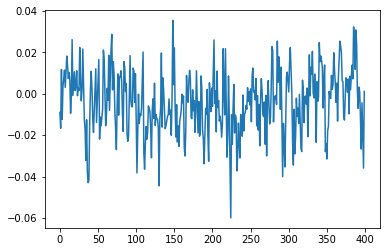

In [42]:
p = data[0].plot.line()

In [45]:
measures = metrics.evaluate_all(data_true, data)

In [46]:
measures

{'me': 0.0161667129858522,
 'mdae': 0.052559499005904564,
 'mse': 0.005794470187896989,
 'mad': 0.061306288086956366,
 'mape': 147651.34028551794,
 'rmse': 0.07612141740599021,
 'gmrae': array([0.59551875, 0.64015058, 0.62050379, 0.62970342, 0.6230107 ,
        0.66583805, 0.63446471, 0.60096419, 0.65281691, 0.58219322,
        0.60990625, 0.63743848, 0.59691658, 0.59073706, 0.63927241,
        0.64254868, 0.59408046, 0.59871297, 0.60622734, 0.59102806,
        0.60992434, 0.63698099, 0.62807069, 0.54403576, 0.5937165 ,
        0.57999313, 0.60276595, 0.60781938, 0.57135926, 0.63383083,
        0.60432198, 0.55977006, 0.58142698, 0.63448747, 0.56671194,
        0.60801586, 0.5580515 , 0.62689342, 0.58718526, 0.58172791,
        0.59018194, 0.58014435, 0.61599153, 0.63779003, 0.62120709,
        0.60844501, 0.61491611, 0.57715562, 0.58439297, 0.56406535,
        0.6440015 , 0.59871827, 0.58806347, 0.55804939, 0.61174639,
        0.59113538, 0.58239418, 0.57772922, 0.53735753, 0.58029288

In [48]:
data_true.max(),data_true.min()

(0.31125415384615385, -0.28663753846153844)

In [50]:
noise = np.random.uniform(data_true.min(), data_true.max(), (608,400))

In [52]:
measures_noise = metrics.evaluate_all(data_true, noise)

In [55]:
y1 = []
y2 = []
a = ['mape', 'gmrae', 'gmae', 'mrae', 'rmspe', 'std_ape', 'mpe', 'mre']
for item in metrics.METRICS:
    if item not in a:
        y1.append(measures[item])
        y2.append(measures_noise[item])

In [56]:
plt.plot(y1,lw=2.5,label="gan",color='blue')
plt.plot(y2,lw=2.5,label="noise",color='red')
plt.title("c",size=20,color='red')
plt.xlabel('Index',size=20)
plt.ylabel('Values',size=20)

[0.005794470187896989,
 0.07612141740599021,
 0.12731639924980917,
 0.0161667129858522,
 0.061306288086956366,
 0.061306288086956366,
 0.052559499005904564,
 1.0313479702451955,
 1.6241912724334147,
 1.9999999804033064,
 0.7984194165760767,
 0.6035391755674488,
 1.7416269547659644,
 1.0313479702454775,
 0.7493889931661307,
 1.047273104371845,
 1.047273104371845,
 1.045087373521865,
 0.6045250005734543,
 0.39564617545623326,
 0.6546598356598651,
 0.4996869851729819]